# Problema 4.03

Sea un sistema de primer orden de ganancia unidad y constante de tiempo
0.5. Inicialmente el sistema está en estado estacionario. Se introduce
una entrada en rampa unidad cuando el tiempo es igual a 0.

1.  Desarrollar una expresión que muestre los cambios en el proceso con
    el tiempo

2.  Cuál es la mínima y la máxima diferencia entre la salida y la
    entrada?

3.  Dibujar la entrada y la salida en función del tiempo

---

**Solución**

a) Hay varias estrategias para desarrollar una expresión que muestre
los cambios en el proceso tras una rampa unidad ($y (t)$). Se puede
resolver directamente la ecuación diferencial o se puede utilizar la
función de transferencia y realizar la transformada inversa de Laplace.

**Resolución de la ecuación diferencial**

Un sistema de primer orden viene descrito por la siguiente ecuación
diferencial (ec. {eq}`ode_primer_orden` de la teoría):

$$\tau_p  \frac{\mathrm{d} y}{\mathrm{d} t} + y = K_p f(t)$$ 

donde $f (t)$ es la entrada al sistema, en nuestro caso una rampa unidad ($f(t) = t$). Sustituyendo las constantes y la función de entrada, se obtiene la ecuación diferencial a resolver:

$$0.5 \frac{\mathrm{d} y}{\mathrm{d} t} + y = t$$

Se puede resolver la ecuación diferencial utilizando Sympy:

In [1]:
using SymPy

t = symbols("t", real=true)
y = SymFunction("y")

eq = Eq(1//2*y'(t)+ y(t), t)

       d           
       ──(y(t))    
       dt          
y(t) + ──────── = t
          2        

Se ha supuesto que se están utilizando variables de desviación, lo que
supone que $y (t = 0) = 0$:

In [2]:
ics = (y, 0, 0)

(y, 0, 0)

Resolviendo la ecuación diferencial, se obtiene:

In [3]:
expand(dsolve(eq, ics=ics))

                -2⋅t
           1   ℯ    
y(t) = t - ─ + ─────
           2     2  

**Función de transferencia**

La función de transferencia de este proceso es:

$$G = \frac{y (s)}{f (s)} = \frac{1}{0.5 s + 1}$$

y la entrada es una rampa unidad, cuya transformada de Laplace es: 

$$f(s) = \frac{1}{s^2}$$

Por tanto la respuesta del proceso es:

$$y(s) = G f(s) = \frac{1}{0.5 s + 1}  \frac{1}{s^2}$$

Para obtener la respuesta dependiente del tiempo hay que realizar la transformada inversa de Laplace:

$$y (t) =\mathcal{L}^{- 1} \left( \frac{1}{0.5 s + 1}  \frac{1}{s^2} \right)$$

Para realizar la transformada inversa se puede utilizar la técnica de
separar en fracciones simples o simplemente utilizar Sympy:

In [4]:
s = symbols("s")

y_t = sympy.inverse_laplace_transform(1/(1//2*s+1)*1/s^2, s, t)

                 -2⋅t     
         θ(t)   ℯ    ⋅θ(t)
t⋅θ(t) - ──── + ──────────
          2         2     

Lógicamente la respuesta obtenida es igual a la obtenida por el método
anterior.

b) La diferencia entre la entrada y la salida es:

$$y (t) - f (t) = \frac{e^{- 2 t}}{2} - \frac{1}{2}$$

La función exponencial es continua y decreciente, si se trata de exponentes negativos, para valores de $t$ mayores que cero, como es el caso. Cuanto $t = 0$, $e^{- 2 t} = 1$. Si el tiempo tiende a infinito, $e^{- 2 t} \underset{t \rightarrow \infty}{\rightarrow} 0$. Por tanto, la diferencia mínima se dará cuando el tiempo es igual a cero, en ese caso la diferencia es de 0. La diferencia máxima se produce cuando el tiempo tiende a infinito, la diferencia es $y (t) - f (t) \underset{t \rightarrow \infty}{\rightarrow} - \frac{1}{2}$.

c) El gráfico de la entrada y la salida en función del tiempo es:


Esta gráfica se ha dibujado a partir de la función respuesta obtenida en el apartado a). En caso de no querer obtener esa función se puede
programar el problema con VisSim y obtener el resultado mediante métodos numéricos.

A continuación se muestra el programa junto con el resultado obtenido:

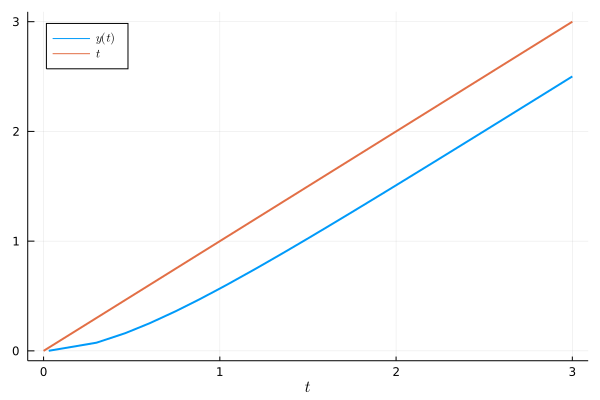

In [5]:
using Plots, LaTeXStrings

plot(y_t, 0, 3, lw=2, label=L"y(t)", xlabel=L"t", legend=:topleft)
plot!(t, 0, 3, label=L"t", lw=2)